### CASE STUDY: LÀM SẠCH TẬP DỮ LIỆU NÔNG NGHIỆP
---

<img src='Pic/agriculture.jpg' width='500px'>

**MÔ TẢ DỮ LIỆU:**

Tập dữ liệu agricultural_raw_material.csv lưu trữ dữ liệu về giá của một số sản phẩm nông nghiệp và tỷ lệ tăng giá bán, dữ liệu được tính theo tháng từ tháng 04/1990 --> 04/2020:
1. Coarse wool (Len Thô)
2. Copra (Giá cùi dừa)
3. Cotton (Giá bông)
4. Fine Wool (Giá len mịn)
5. Hard log (Giá gỗ cứng)
6. Hard sawnwood (Giá gỗ xẻ cứng)
7. Hide (da thú)
8. Rubber (Cao su)

---
**MỤC TIÊU PROJECT:**
* Tập dữ liệu thô (Raw data) về giá và tỷ lệ thay đổi giá của một số mặt hàng nông nghiệp của USA. File dữ liệu này cần phải được xử lý và làm sạch trước khi sử dụng cho phân tích hay bất kỳ mục đích gì?

## Bước 1) Đọc và kiểm tra dữ liệu (Data audit)
---
Để bắt đầu quy trình làm sạch dữ liệu việc đầu tiên là cần kiểm tra, xem xét kỹ những dữ liệu đã thu thập và sẽ được sử dụng. Xác định các loại lỗi mà tập dữ liệu có thể chứa và vị trí của chúng. Việc này có thể được thực hiện thông qua các phương pháp thống kê và cơ sở dữ liệu để tìm ra những điểm bất thường, mâu thuẫn.!

In [6]:
#Gọi các thư viện sử dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#---------------------------------
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Đọc file dữ liệu
path='Data/agricultural_raw_material.csv'
data_raw = pd.read_csv(path)
#Hiển thị thông tin dữ liệu:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [8]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%


In [9]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
data_raw.tail()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,-0.22%,NaN,NaN,NaN,NaN,1.66,7.79%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,-0.15%,NaN,NaN,NaN,NaN,1.68,1.20%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,-0.68%,NaN,NaN,NaN,NaN,1.61,-4.17%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,2.35%,NaN,NaN,NaN,NaN,1.50,-6.83%
360,Apr-20,NaN,NaN,NaN,NaN,1.40,-6.04%,NaN,NaN,276.24,-0.25%,NaN,NaN,NaN,NaN,1.33,-11.33%


In [10]:
#hiển thị 5 mẫu ngẫu nhiên trong dữ liệu
data_raw.sample(5)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
213,Jan-08,840.86,2.86%,848,10.85%,1.61,5.23%,"1,157.37",5.48%,287.08,4.26%,812.62,3.08%,65.47,-4.28%,2.62,5.65%
156,Apr-03,685.72,0.61%,273,-6.19%,1.34,-0.74%,740.17,0.88%,180.00,-2.27%,550.06,0.17%,67.97,-3.05%,1.00,-5.66%
10,Feb-91,323.23,1.18%,226,-3.00%,1.87,1.08%,596.02,-32.84%,176.93,4.57%,492.56,-0.90%,75.90,-7.03%,0.85,-2.30%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,-0.68%,NaN,NaN,NaN,NaN,1.61,-4.17%
48,Apr-94,376.82,-0.64%,377,3.29%,1.85,2.78%,645.79,5.94%,326.24,5.08%,819.89,6.34%,84.75,7.33%,0.95,4.40%


## Một số điểm bất thường với dữ liệu:
---
* Dữ liệu cột Month (dạng Chuỗi) - Chưa đúng định dạng ngày tháng
* Dữ liệu các cột tỷ lệ % (dạng chuỗi) - Chưa phải là dạng số
* Tồn tại các điểm dữ liệu khuyết thiếu (missing data); các điểm dữ liệu thiếu tập trung ở cuối của tập dữ liệu --> Không phải toàn bộ 8 mặt hàng đều có dữ liệu đến thời điểm kết thúc là 4/2020

## Bước 2) Xây dựng luồng công việc (Workflow specification)
---
Giai đoạn này sẽ xác định các thao tác, hoạt động, trình tự làm sạch tập dữ liệu.  Quy trình làm sạch dữ liệu điển hình bao gồm một loạt thao tác được thực hiện lặp lại trên dữ liệu cho đến khi đạt được tập dữ liệu chất lượng.!

**A.Chuẩn hóa dữ liệu:**
1. Chuẩn hóa dữ liệu thời gian cột Month: 
    * Tách thành hai cột Year (YY) | Month(text)
    * Chuyển Year về năm đầy đủ (YYYY)
    * Chuyển dữ liệu Month từ Text ---> Số
2. Chuẩn hóa dữ liệu tỷ lệ % tăng giá dòng dầu tiên từ '-' về số 0
3. Chuẩn hóa dữ liệu tỷ lệ % tăng giá
    * Bỏ dấu % trong số liệu
    * Chuyển về dữ liệu float
4. Chuẩn hóa dữ liệu giá bán: trường hợp giá lớn hơn 1000 có dấu , phân cách giữa hàng trăm và hàng nghìn (1,011.45 -- kiểu: object)
    * Bỏ dấu , khỏi chuỗi
    * Chuyển về kiểu dữ liệu float

**B. Kiểm tra và xử lý dữ liệu thiếu (nếu có)**

**C. Kiểm tra và xử lý dữ trùng lặp (nếu có)**

**D. Kiểm tra và xử lý dữ liệu ngoại lai (nếu có):**

In [49]:
data_clean.isnull().sum()

Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Rubber Price                     0
Rubber price % Change            0
dtype: int64

## Bước 3 - Thực thi luồng công việc (Workflow execution)
---
Thực hiện các kỹ thuật làm sạch dữ liệu theo như luồng công việc đã xây dựng ở bước 2. Quá trình làm sạch dữ liệu có thể có các phương thức, kỹ thuật khác nhau phụ thuộc vào bản chất của dữ liệu và từng dự án cụ thể. Nhưng mục tiêu cuối cùng luôn giống nhau đó là loại bỏ hoặc chỉnh sửa dữ liệu thô ban đầu để thu được dữ liệu sạch.!

In [11]:
#Tạo bản sao dữ liệu:
data_clean = data_raw.copy()

In [12]:
#Khai báo dánh sách các tên cột ứng với dữ liệu Price và tỷ lệ % thay đổi giá
#Danh sách các cột Price:
prices=['Coarse wool Price',
       'Copra Price', 
       'Cotton Price',
       'Fine wool Price',
       'Hard log Price', 
       'Hard sawnwood Price',
       'Hide Price', 
       'Rubber Price']

#Danh sách các cột % Change:
percentages=['Coarse wool price % Change',
            'Copra price % Change', 
            'Cotton price % Change', 
            'Fine wool price % Change',
            'Hard log price % Change', 
            'Hard sawnwood price % Change', 
            'Hide price % change',
            'Rubber price % Change']

## A. Chuẩn hóa dữ liệu
### 3.1) Chuẩn hóa dữ liệu thời gian cột Month
---
Tách thành 2 phần year - month từ cột Month dựa vào ký hiệu -

In [13]:
#Dữ liệu ban đầu:
data_clean.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%


In [14]:
#Bổ sung 2 cột mới (month, year) lưu dữ liệu
data_clean["month"] = [str(s.split("-")[0]) for s in data_clean["Month"]]
data_clean["year"] = [int(s.split("-")[1]) for s in data_clean["Month"]]

#Hiển thị kết quả xử lý:
data_clean.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change,month,year
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-,Apr,90
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%,May,90
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%,Jun,90
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%,Jul,90
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%,Aug,90


In [15]:
#Year chỉ bao gồm 2 số cuối của năm cần thực hiện
#Chuyển Year về đúng định dạng năm: 19xx - 20xx (<89)
data_clean['year'] = [2000 + i if i < 89 else 1900 + i for i in data_clean["year"]]

#Hiển thị kết quả xư lý:
data_clean.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change,month,year
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-,Apr,1990
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%,May,1990
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%,Jun,1990
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%,Jul,1990
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%,Aug,1990


In [16]:
data_clean.tail(5)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change,month,year
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,-0.22%,NaN,NaN,NaN,NaN,1.66,7.79%,Dec,2019
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,-0.15%,NaN,NaN,NaN,NaN,1.68,1.20%,Jan,2020
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,-0.68%,NaN,NaN,NaN,NaN,1.61,-4.17%,Feb,2020
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,2.35%,NaN,NaN,NaN,NaN,1.50,-6.83%,Mar,2020
360,Apr-20,NaN,NaN,NaN,NaN,1.40,-6.04%,NaN,NaN,276.24,-0.25%,NaN,NaN,NaN,NaN,1.33,-11.33%,Apr,2020


In [17]:
# Chuyển đổi dữ liệu cột month từ string của các tháng --> số
#Check các 'ký hiệu' tháng khác nhau trong cột month
data_clean['month'].unique()

array(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar'], dtype=object)

In [18]:
#Thực hiện chuyển sang số nguyên ứng với các ký hiệu của từng tháng
mapping = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, 
           "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
data_clean["month"] = data_clean["month"].map(mapping).astype("int16")

#Hiển thị kết quả xử lý:
data_clean.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change,month,year
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-,4,1990
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%,5,1990
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%,6,1990
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%,7,1990
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%,8,1990


In [19]:
#Cột year dữ liệu năm - cột month dữ liệu tháng
#Tạo ra một một dữ liệu datetime ghép từ Year và Month
data_clean["Date"] = [str(y) + '-' + str(m) for y,m in zip(data_clean["year"], data_clean["month"])]

#chuyển đổi cột Date về dạng DateTime
data_clean['Date']=pd.to_datetime(data_clean["Date"])

#Hiển thị kết quả xử lý:
data_clean.head()


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change,month,year,Date
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-,4,1990,1990-04-01
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%,5,1990,1990-05-01
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%,6,1990,1990-06-01
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%,7,1990,1990-07-01
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%,8,1990,1990-08-01


In [20]:
##Xóa các cột dữ thừa không sử dụng
data_clean.drop(["Month","year","month"], axis=1,inplace=True)

#Thiết lập cột Date thành cột chỉ số (index)
data_clean.set_index("Date",inplace=True)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    object 
 1   Coarse wool price % Change    327 non-null    object 
 2   Copra Price                   339 non-null    object 
 3   Copra price % Change          339 non-null    object 
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    object 
 6   Fine wool Price               327 non-null    object 
 7   Fine wool price % Change      327 non-null    object 
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    object 
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    object 
 12  Hide Price                    327 non-null   

In [21]:
data_clean.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
1990-04-01,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-
1990-05-01,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%
1990-06-01,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%
1990-07-01,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%
1990-08-01,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%


### 3.2) Xử lý dữ liệu các cột tỷ lệ thay đổi giá.
---
* Xử lý dòng dữ liệu đầu tiên của Data_raw
* Thay thế ký hiệu - thành ký tự 0

In [22]:
#Thực hiện thay thế toàn bộ ký tự - trong dữ liệu thành ký tự 0
data_clean = data_clean.replace('-','0')

#Kết quả sau xử lý:
data_clean.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
1990-04-01,482.34,0,236,0,1.83,0,"1,071.63",0,161.20,0,549.91,0,100.00,0,0.84,0
1990-05-01,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%
1990-06-01,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%
1990-07-01,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%
1990-08-01,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%


### 3.3) Loại bỏ ký hiệu % trong số liệu và chuyển sang kiểu dữ liệu float
---

In [23]:
#Xóa ký hiệu % trong các cột % change:
for i in percentages:
    data_clean[i] = data_clean[i].apply(lambda x: str(x).replace('%',''))
    data_clean[i] = data_clean[i].astype('float')

#Kết quả sau xử lý:
data_clean.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
1990-04-01,482.34,0.00,236,0.00,1.83,0.00,"1,071.63",0.00,161.20,0.00,549.91,0.00,100.00,0.00,0.84,0.00
1990-05-01,447.26,-7.27,234,-0.85,1.89,3.28,"1,057.18",-1.35,172.86,7.23,491.88,-10.55,99.46,-0.54,0.85,1.19
1990-06-01,440.99,-1.40,216,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,495.39,0.71,97.90,-1.57,0.85,0.00
1990-07-01,418.44,-5.11,205,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,485.86,-1.92,96.75,-1.17,0.86,1.18
1990-08-01,418.44,0.00,198,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,487.52,0.34,91.89,-5.02,0.88,2.33


In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    object 
 1   Coarse wool price % Change    327 non-null    float64
 2   Copra Price                   339 non-null    object 
 3   Copra price % Change          339 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    float64
 6   Fine wool Price               327 non-null    object 
 7   Fine wool price % Change      327 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    float64
 12  Hide Price                    327 non-null   

### 2.4) Xử lý dữ liệu có dấu ',' khi lớn hơn 1000 trong các cột price
---

In [25]:
data_clean.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
1990-04-01,482.34,0.00,236,0.00,1.83,0.00,"1,071.63",0.00,161.20,0.00,549.91,0.00,100.00,0.00,0.84,0.00
1990-05-01,447.26,-7.27,234,-0.85,1.89,3.28,"1,057.18",-1.35,172.86,7.23,491.88,-10.55,99.46,-0.54,0.85,1.19
1990-06-01,440.99,-1.40,216,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,495.39,0.71,97.90,-1.57,0.85,0.00
1990-07-01,418.44,-5.11,205,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,485.86,-1.92,96.75,-1.17,0.86,1.18
1990-08-01,418.44,0.00,198,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,487.52,0.34,91.89,-5.02,0.88,2.33


In [26]:
#Thực hiện xóa dấu , và ép kiểu dữ liệu:
for i in prices:
    data_clean[i] = data_clean[i].apply(lambda x: str(x).replace(',',''))
    data_clean[i] = data_clean[i].astype('float')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    float64
 1   Coarse wool price % Change    327 non-null    float64
 2   Copra Price                   339 non-null    float64
 3   Copra price % Change          339 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    float64
 6   Fine wool Price               327 non-null    float64
 7   Fine wool price % Change      327 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    float64
 12  Hide Price                    327 non-null   

In [27]:
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,0.84,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,0.85,1.19%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,0.85,0.00%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,0.86,1.18%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,0.88,2.33%


In [28]:
data_clean

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
1990-04-01,482.34,0.00,236.0,0.00,1.83,0.00,1071.63,0.00,161.20,0.00,549.91,0.00,100.00,0.00,0.84,0.00
1990-05-01,447.26,-7.27,234.0,-0.85,1.89,3.28,1057.18,-1.35,172.86,7.23,491.88,-10.55,99.46,-0.54,0.85,1.19
1990-06-01,440.99,-1.40,216.0,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,495.39,0.71,97.90,-1.57,0.85,0.00
1990-07-01,418.44,-5.11,205.0,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,485.86,-1.92,96.75,-1.17,0.86,1.18
1990-08-01,418.44,0.00,198.0,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,487.52,0.34,91.89,-5.02,0.88,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,NaN,NaN,NaN,NaN,1.67,1.21,NaN,NaN,272.80,-0.22,NaN,NaN,NaN,NaN,1.66,7.79
2020-01-01,NaN,NaN,NaN,NaN,1.74,4.19,NaN,NaN,272.40,-0.15,NaN,NaN,NaN,NaN,1.68,1.20
2020-02-01,NaN,NaN,NaN,NaN,1.69,-2.87,NaN,NaN,270.56,-0.68,NaN,NaN,NaN,NaN,1.61,-4.17


## B. Kiểm tra và xử lý dữ liệu thiếu (missing values)
---

In [29]:
#Thông kế và kiểm tra dữ liệu thiếu:
data_clean.isnull().sum()

Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Rubber Price                     0
Rubber price % Change            0
dtype: int64

In [30]:
#Liệt kê danh sách các bản ghi chứa dữ liệu thiếu:
data_clean[data_clean.isnull().any(axis=1)]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Rubber Price,Rubber price % Change
Date,,,,,,,,,,,,,,,,
2017-07-01,NaN,NaN,1059.0,-5.36,1.85,-1.07,NaN,NaN,264.62,-1.40,NaN,NaN,NaN,NaN,1.75,1.74
2017-08-01,NaN,NaN,1062.0,0.28,1.75,-5.41,NaN,NaN,270.96,2.40,NaN,NaN,NaN,NaN,1.84,5.14
2017-09-01,NaN,NaN,1015.0,-4.43,1.78,1.71,NaN,NaN,268.93,-0.75,NaN,NaN,NaN,NaN,1.86,1.09
2017-10-01,NaN,NaN,989.0,-2.56,1.73,-2.81,NaN,NaN,263.62,-1.97,NaN,NaN,NaN,NaN,1.64,-11.83
2017-11-01,NaN,NaN,1038.0,4.95,1.77,2.31,NaN,NaN,263.85,0.09,NaN,NaN,NaN,NaN,1.57,-4.27
2017-12-01,NaN,NaN,958.0,-7.71,1.88,6.21,NaN,NaN,263.62,-0.09,NaN,NaN,NaN,NaN,1.65,5.10
2018-01-01,NaN,NaN,942.5,-1.62,2.01,6.91,NaN,NaN,268.30,1.78,NaN,NaN,NaN,NaN,1.72,4.24
2018-02-01,NaN,NaN,835.0,-11.41,1.95,-2.99,NaN,NaN,275.80,2.80,NaN,NaN,NaN,NaN,1.72,0.00
2018-03-01,NaN,NaN,745.0,-10.78,2.03,4.10,NaN,NaN,280.72,1.78,NaN,NaN,NaN,NaN,1.76,2.33


**NHẬN XÉT:**

* Dữ liệu giá là dữ liệu dạng chuỗi thời gian với tần suất lấy mẫu là 1 tháng.
* Các điểm dữ liệu thiếu không nằm trong chuỗi mà nằm ở cuối chuỗi. 
* Các mặt hàng: Coarse wool; Fine Wool; Hard sawnwood; Hide dữ liệu có đến 06/2017
* Mặt hàng: Copra dữ liệu đến tháng 06/2018 
* Các mặt hàng còn lại đủ dữ liệu đến hết thời gian 04/2020

---> Không cần phải xử lý dữ liệu thiếu. Dữ liệu có đến thời điểm nào sử dụng đến thời điểm đó.

In [31]:
#Thực hiện xóa toàn bộ các dữ liệu không có dữ liệu
#data_raw.dropna(axis=0,how='any',inplace=True)

#Kiểm tra lại dữ liệu thiếu:
#data_raw.isnull().sum()

## C. Kiểm tra và xử lý dữ liệu trùng lặp (Duplicated data)
---

In [32]:
#Kiểm tra dữ liệu trùng lặp
data_clean.duplicated().sum()

#--> Nhận xét: Trong dữ liệu không có hàng trùng lặp

0

## D. Kiểm tra và xử lý dữ liệu bất thường
---

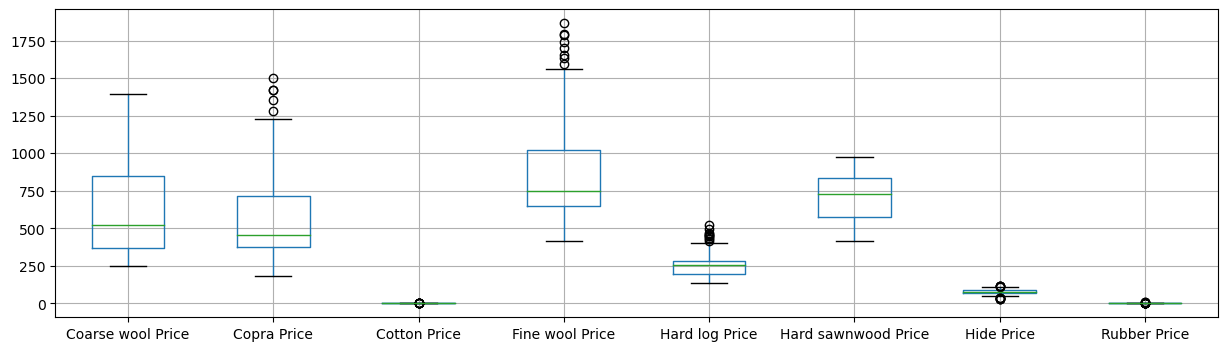

In [33]:
#Biểu đồ boxplot thể hiện dữ liệu giá bán:
plt.figure(figsize=(15,4))
data_clean[prices].boxplot()
plt.show()

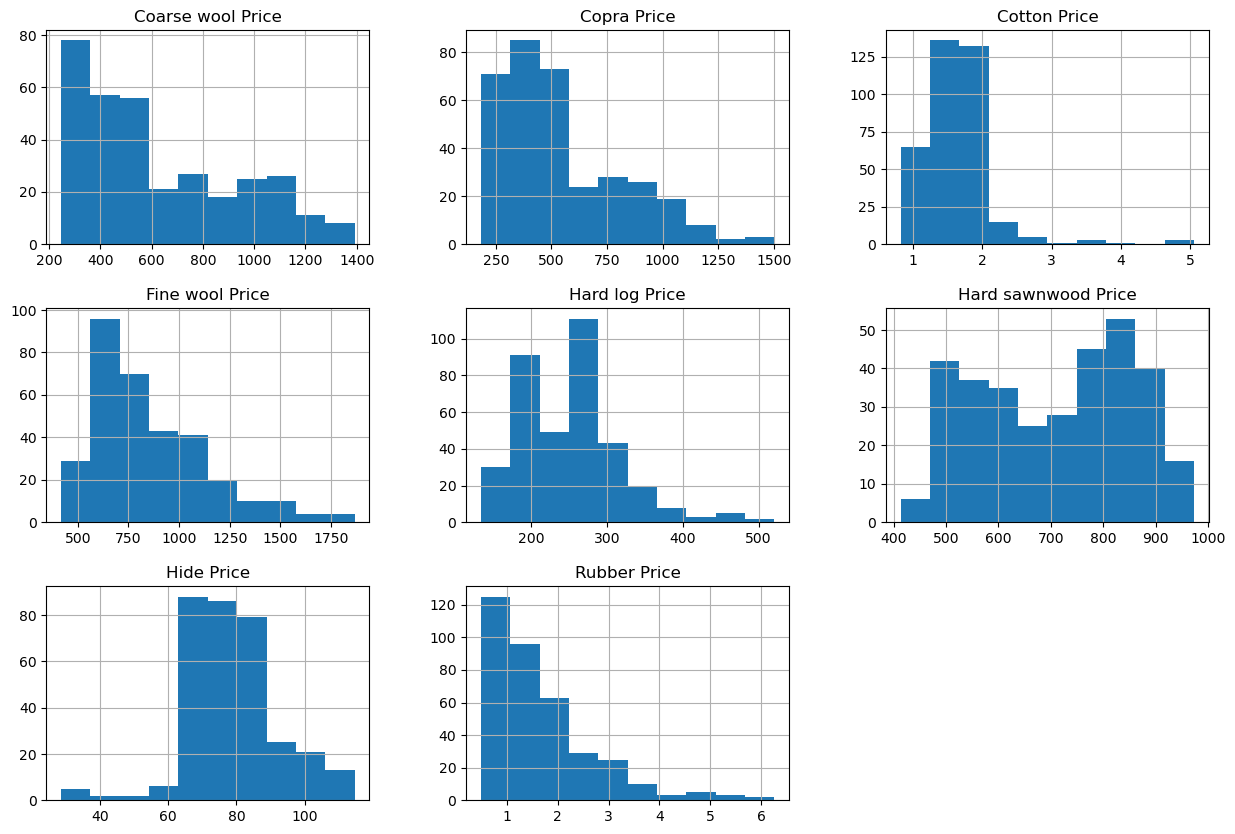

In [34]:
#Vẽ biểu đồ Histogram phân bố giá:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data_clean[prices].hist(ax = ax)
plt.show()

In [35]:
#--> Có một vài giá trị cao hơn so với trung bình, nhưng không quá khác biệt;
#Không có dữ liệu bất thường trong giá của các mặt hàng

## Bước 4 - Kiểm tra, Xác thực (Validation)
---
Sau khi thực hiện làm sạch cần kiểm tra lại dữ liệu và đảm bảo rằng tất cả các yêu cầu và ràng buộc đã được thực thi, và thực thi đầy đủ trên dữ liệu thực tế. !

In [36]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    float64
 1   Coarse wool price % Change    327 non-null    float64
 2   Copra Price                   339 non-null    float64
 3   Copra price % Change          339 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    float64
 6   Fine wool Price               327 non-null    float64
 7   Fine wool price % Change      327 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    float64
 12  Hide Price                    327 non-null   

In [37]:
#quan sát đặc trưng thống kê dữ liệu giá:
data_clean[prices].describe()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Rubber Price
count,327.000000,339.000000,361.000000,327.000000,361.000000,327.000000,327.000000,361.000000
mean,626.333731,542.023805,1.640000,850.119572,251.034072,707.950367,78.566667,1.656427
std,299.638838,269.419179,0.513319,285.075196,65.628406,144.563241,13.690623,1.017086
min,247.090000,182.000000,0.820000,417.470000,133.280000,413.370000,28.590000,0.490000
25%,369.620000,372.000000,1.290000,646.345000,197.960000,573.470000,69.495000,0.860000
50%,525.070000,458.000000,1.600000,748.180000,253.010000,728.710000,77.250000,1.440000
75%,847.120000,714.000000,1.850000,1019.870000,282.970000,831.635000,86.000000,2.060000
max,1391.470000,1503.000000,5.060000,1865.440000,520.810000,973.600000,114.630000,6.260000


In [38]:
#quan sát đặc trưng thống kê dữ liệu thay đổi giá:
data_clean[percentages].describe()

,Coarse wool price % Change,Copra price % Change,Cotton price % Change,Fine wool price % Change,Hard log price % Change,Hard sawnwood price % Change,Hide price % change,Rubber price % Change
count,327.000000,339.000000,361.000000,327.000000,361.000000,327.000000,327.000000,361.000000
mean,0.379908,0.559912,0.075983,0.306361,0.247147,0.127095,0.050948,0.403380
std,5.269682,7.490805,5.487211,6.707089,4.506988,3.322609,5.711262,7.419312
min,-22.250000,-19.170000,-23.640000,-32.840000,-14.760000,-12.240000,-42.140000,-32.160000
25%,-2.715000,-3.925000,-2.810000,-3.450000,-1.970000,-0.985000,-2.035000,-3.570000
50%,-0.080000,0.000000,0.000000,-0.270000,-0.030000,0.000000,0.000000,0.000000
75%,2.945000,4.840000,2.990000,3.470000,2.350000,1.380000,2.175000,4.440000
max,21.990000,31.820000,22.220000,27.070000,34.190000,21.960000,29.240000,24.170000


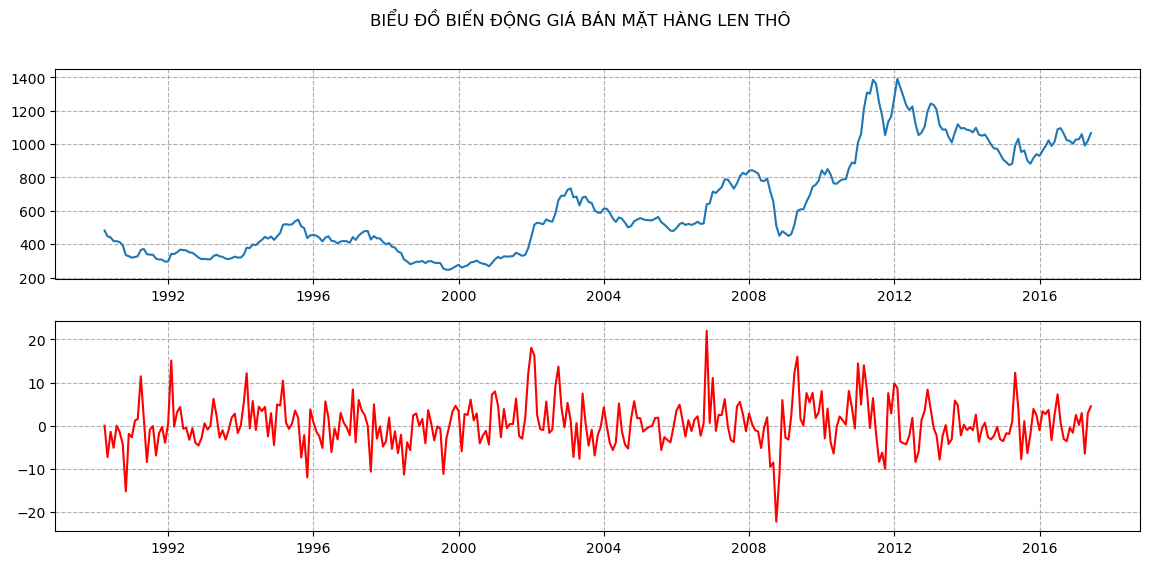

In [39]:
#1. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG LEN THÔ (Coarse wool)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG LEN THÔ')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Coarse wool Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Coarse wool price % Change'], color='red')
plt.grid(ls='--')
plt.show()

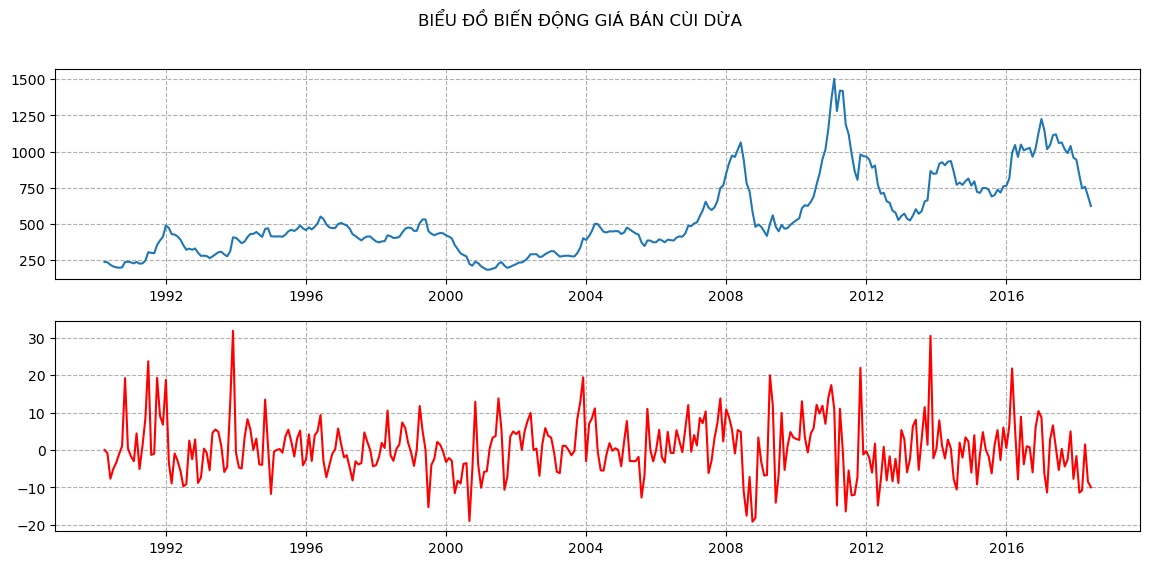

In [40]:
#2. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG CÙI DỪA (Copra)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN CÙI DỪA')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Copra Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Copra price % Change'], color='red')
plt.grid(ls='--')
plt.show()

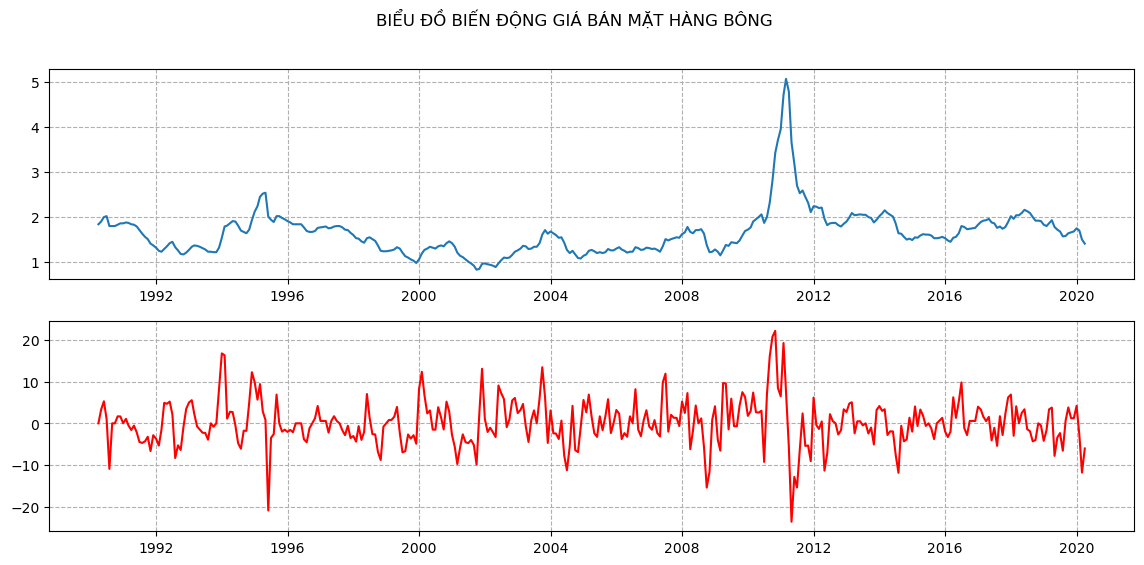

In [41]:
#3. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG BÔNG (Cotton)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG BÔNG')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Cotton Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Cotton price % Change'], color='red')
plt.grid(ls='--')
plt.show()

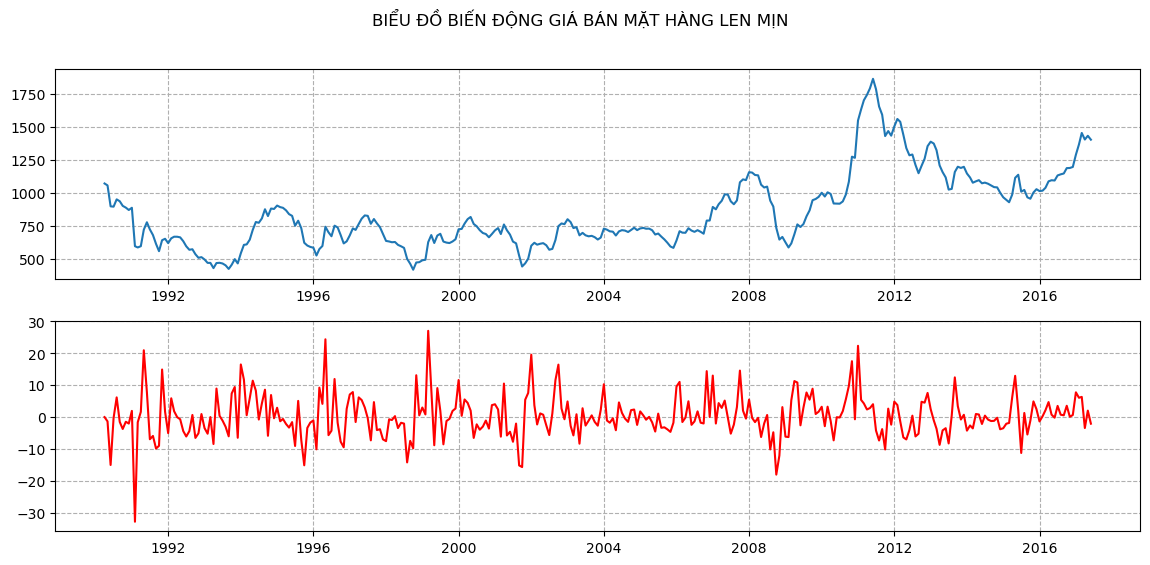

In [42]:
#4. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG LEN MỊN (Fine wool)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG LEN MỊN')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Fine wool Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Fine wool price % Change'], color='red')
plt.grid(ls='--')
plt.show()

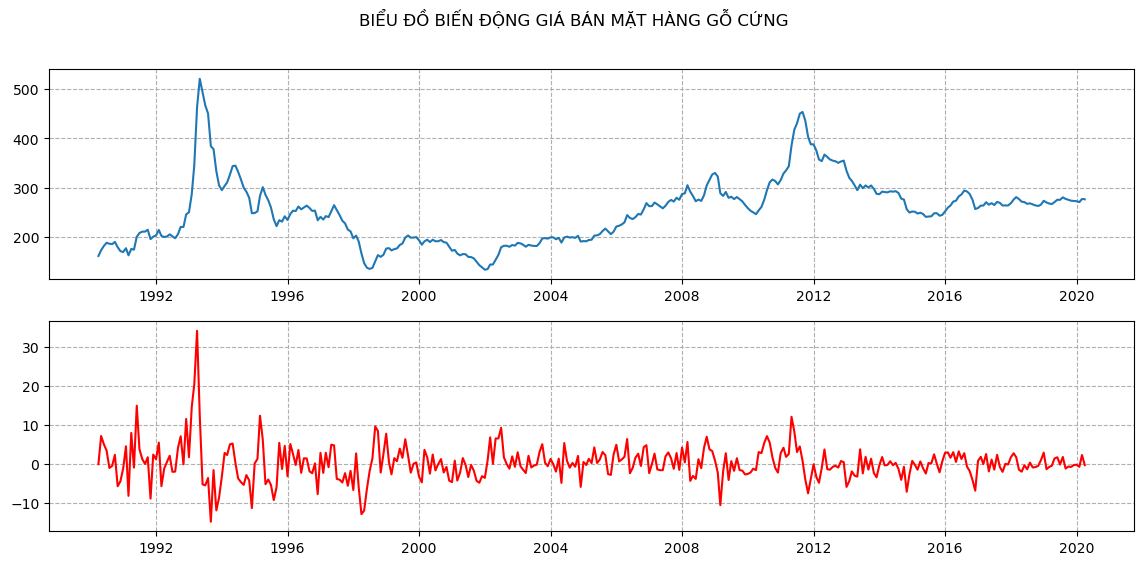

In [43]:
#5. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG GỖ CỨNG (Hard log)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG GỖ CỨNG')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Hard log Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Hard log price % Change'], color='red')
plt.grid(ls='--')
plt.show()

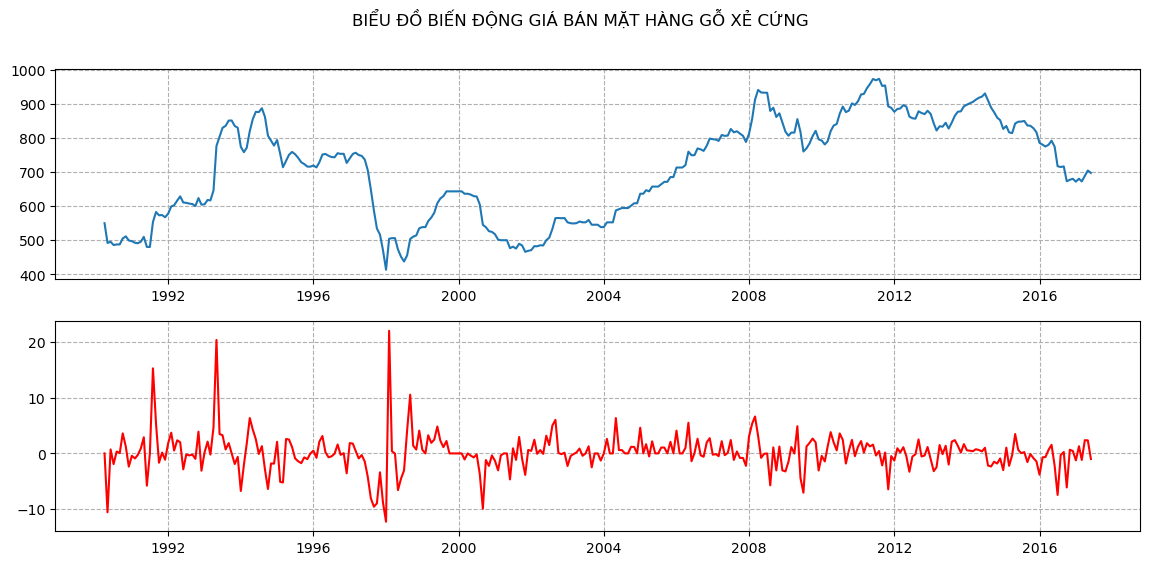

In [44]:
#6. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG GỖ XẺ CỨNG (Hard sawnwood Price)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG GỖ XẺ CỨNG')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Hard sawnwood Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Hard sawnwood price % Change'], color='red')
plt.grid(ls='--')
plt.show()

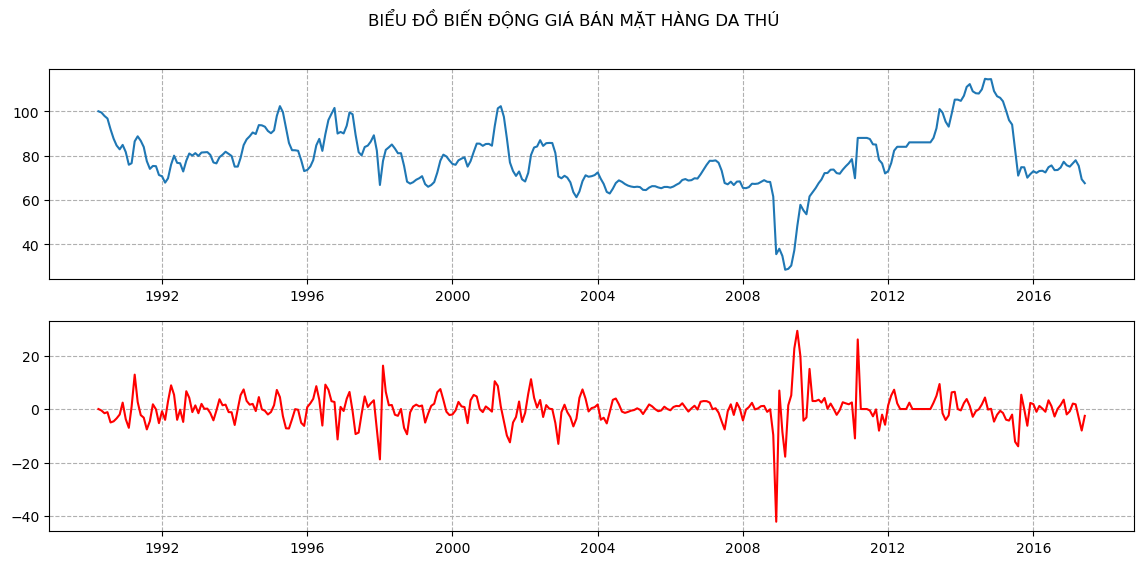

In [45]:
#7. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG DA THÚ
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG DA THÚ')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Hide Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Hide price % change'], color='red')
plt.grid(ls='--')
plt.show()

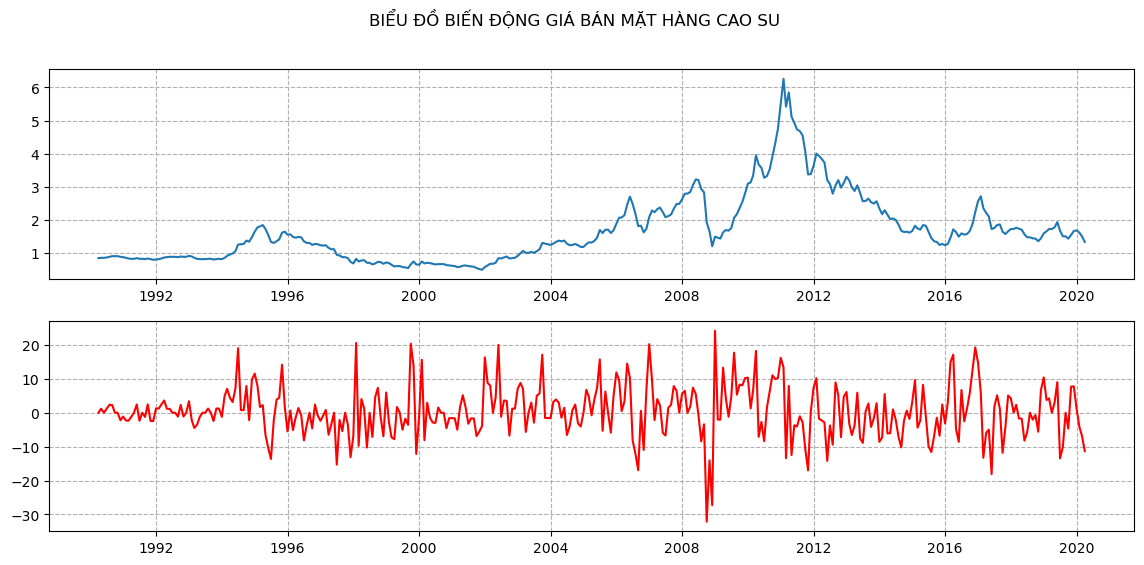

In [46]:
#8. TRỰC QUAN HÓA DỮ LIỆU MẶT HÀNG CAO SU (Rubber)
plt.figure(figsize=(14,6))
plt.suptitle('BIỂU ĐỒ BIẾN ĐỘNG GIÁ BÁN MẶT HÀNG CAO SU')
plt.subplot(2,1,1)
plt.plot(data_clean.index,data_clean['Rubber Price'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.plot(data_clean.index,data_clean['Rubber price % Change'], color='red')
plt.grid(ls='--')
plt.show()

## Lưu dữ liệu đã làm sạch
---

In [47]:
#Lưu Dữ liệu sau khi đã chuẩn hóa dữ liệu thô ra file .CSV
data_clean.to_csv('Data/Data_Agriculture_OK.csv')